In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 2.1: RGB Image

In [2]:
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as pl

In [3]:
import numpy as npy

In [4]:
def print_gray(img, l):
    if len(l) == 1:
        img = img[..., npy.newaxis]
        
    for j, label in enumerate(l):
        minV = npy.min(image[:,:,j])
        maxV = npy.max(image[:,:,j])
        print(f'{label} : min={minV:.4f}, max={maxV:.4f}')

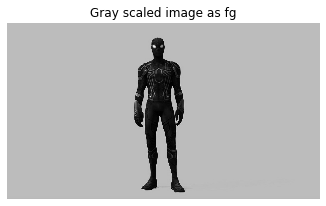

In [9]:
img_fg = imread('/content/drive/MyDrive/diphw/fg.jpg', as_gray =True)
fg, ax = pl.subplots(figsize=(5, 10))
imshow(img_fg, ax=ax)
ax.set_title('Gray scaled image as fg')
ax.axis('off');

In [10]:
img_RGB = imread('/content/drive/MyDrive/diphw/fg.jpg')

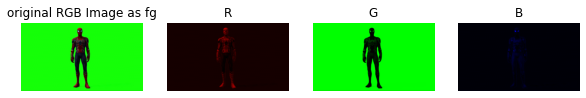

In [12]:
fg, ax = pl.subplots(1, 4, figsize = (10, 20))
ax[0].imshow(img_RGB/255.0) 
ax[0].axis('off')
ax[0].set_title('original RGB Image as fg')
for j, label in enumerate(['R','G','B'], 1):
    t = npy.zeros(img_RGB.shape)
    t[:,:,j - 1] = img_RGB[:,:,j - 1]
    ax[j].imshow(t/255.0) 
    ax[j].axis("off")
    ax[j].set_title(label)
pl.show()

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


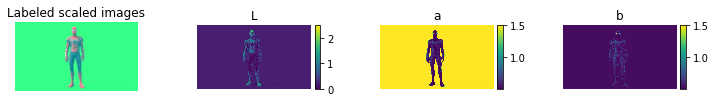

In [18]:
#Scalling image as fg  i=collumn
img_label_sc = (img_RGB + [0, 128, 128]) / [100, 255, 255]
fg, ax = pl.subplots(1, 4, figsize = (10, 20))
ax[0].imshow(img_label_sc) 
ax[0].axis('off')
ax[0].set_title('Labeled scaled images')
for j, i in enumerate(['L', 'a', 'b'], 1):
    imshow(img_label_sc[:, :, j-1], ax=ax[j])
    ax[j].axis('off')
    ax[j].set_title(i)
    
fg.show()

Problem 2.2: RGB Image

In [19]:
import numpy as npy
import PIL
%matplotlib inline

In [27]:
import matplotlib.pyplot as pl

In [31]:
def high_feq(img_fg, img_lena ):
    f, ax = pl.subplots(1, 2, figsize=(5,5))
    ax[0].imshow(img_fg)
    ax[1].imshow(img_lena)
    ax[0].axis('off') 
    ax[1].axis('off')
    f.tight_layout()
    pl.show()

In [32]:
import cv2 

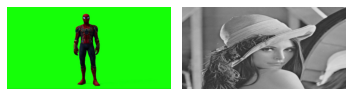

In [33]:
img_fg = cv2.imread("/content/drive/MyDrive/diphw/fg.jpg")
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGR2RGB)
img_lena = cv2.imread("/content/drive/MyDrive/diphw/lena.jpg")
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)

dim = (400, 200)

img_fg = cv2.resize(img_fg, dim, interpolation = cv2.INTER_AREA)
img_lena = cv2.resize(img_lena, dim, interpolation = cv2.INTER_AREA)

high_feq(img_fg, img_lena)

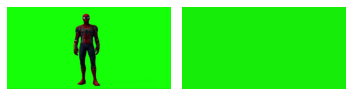

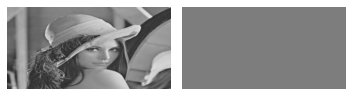

In [35]:
fg_img_temp = img_fg.copy()
fg_img_temp[:,:,0], fg_img_temp[:,:,1], fg_img_temp[:,:,2] = npy.average(img_fg, axis=(0,1))

lena_img_temp = img_lena.copy()
lena_img_temp[:,:,0], lena_img_temp[:,:,1], lena_img_temp[:,:,2] = npy.average(img_lena, axis=(0,1))

high_feq(img_fg, fg_img_temp)
high_feq(img_lena, lena_img_temp)

Problem 2.3: RGB Image

In [36]:
import numpy as npy
from matplotlib import pyplot as pl

In [37]:
import cv2 as cv

In [38]:
fg_img = cv.imread('/content/drive/MyDrive/diphw/fg.jpg')

In [39]:
#m=mask
m = npy.zeros(fg_img.shape[:2], npy.uint8)

In [52]:
#bgm= back ground Model, fgm=fore ground Model
bgm = npy.zeros((1, 65), npy.float64)
fgm = npy.zeros((1, 65), npy.float64)
print(bgm)
print(fgm)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [42]:
#r=rectangle
r = (10, 80, 100, 100)

In [53]:
cv.grabCut(fg_img, m, r, bgm, fgm,2, cv.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 8.87628038e-01,  4.01757813e-02,  9.01909722e-03,
          2.27473958e-02,  4.04296875e-02,  7.99605642e+00,
          2.54989771e+02,  2.09911447e+01,  2.04155188e+01,
          1.15645762e+01,  1.59022849e+01,  5.52284649e+01,
          6.24026708e+01,  7.66983879e+01,  1.51926159e+01,
          6.14906506e+00,  7.33486930e+01,  1.74606280e+01,
          2.36047933e+02,  2.74993827e+01,  9.59090874e-02,
         -1.01608970e-02,  4.57551271e-02, -1.01608970e-02,
          1.01247140e-02, -7.70636748e-03,  4.57551271e-02,
         -7.70636748e-03,  4.99852720e-02,  1.74629564e+02,
          9.83257709e+01,  2.12558566e+01,  9.83257709e+01,
          8.13581294e+01,  2.82184583e+01,  2.12558566e+01,
          2.82184583e+01,  1.07368402e+02,  1.61911299

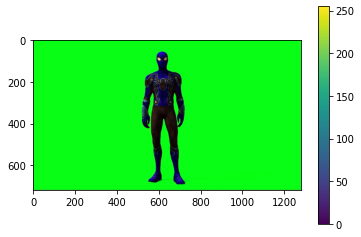

In [56]:
m2 = npy.where((m == 1)|(m ==1), 0, 2).astype('uint8')
image1 = fg_img * m2[:, :, npy.newaxis]

pl.imshow(fg_img)
pl.colorbar()
pl.show()